In [71]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [72]:
directory = "D:/json files/"
json_files = []
for filename in os.listdir(directory):
    try:
        data = json.load(open(directory+str(filename)))
        if str(filename!="Json") and type(data)==dict:
            my_dict = {}
            for item in data:
                my_dict['PolicyScalars.HasDistributions'] = data.get('PolicyScalars').get('HasDistributions')
                my_dict['PolicyScalars.DistributionStartYear'] = data.get('PolicyScalars').get('DistributionStartYear')
                my_dict['PolicyScalars.DistributionEndYear'] = data.get('PolicyScalars').get('DistributionEndYear')
                my_dict['PolicyScalars.PremiumDuration'] = data.get('PolicyScalars').get('PremiumDuration')
                my_dict['PolicyScalars.FaceAmountTotal'] = data.get('PolicyScalars').get('FaceAmountTotal')
                my_dict['ReferenceData.IllustrationID'] = data.get('ReferenceData').get('IllustrationID')
                my_dict['ReferenceData.SalesConcept']  =  data.get('ReferenceData').get('SALES_CONCEPT')
                my_dict['Insured1.AgeAtIssue'] = data.get("Insured1").get("AgeAtIssue")
                my_dict['Riders'] = data.get('Riders')
                my_dict['Product.ProductName'] = data.get('Product').get('ProductName')
                my_dict['Product.ProductFamily'] = data.get('Product').get('ProductFamily')
                my_dict['ReferenceData.RunDateTimeUTC'] = data.get('ReferenceData').get('RunDateTimeUTC')
            json_files.append(my_dict)
    except:
        pass


In [73]:
for file in json_files:
    file['NLG'] = False;
    file['LTC'] = False;
    if type(file['Riders']) == list:
        for rider in file['Riders']:
            if rider['Name'] == 'Flexible Duration No Lapse Guarantee Rider (No-Lapse Guarantee Rider)':
                file['NLG'] = True;
            elif rider['Name'] == 'Accelerated Death Benefit Rider for Long-Term Care (Premier LTC Rider)':
                file['LTC'] = True;

In [74]:
additional_data = pd.DataFrame(pd.read_csv("../Additional_Data.csv"))
additional_data 

#OFFICE_MAPPING = pd.DataFrame(additional_data.groupby(['OFFICE']))
#['PARENT_OFFICE_NAME']
#[['OFFICE',"PARENT_OFFICE_NAME"]])
#OFFICE_MAPPING.columns = ['OFFICE','PARENT_OFFICE_NAME']
#OFFICE_MAPPING = OFFICE_MAPPING.set_index('OFFICE')
#OFFICE_MAPPING

,Policy_Number,IllustrationID,LISTBILL,OFFICE,PARENT_OFFICE_NAME,DISTRIBUTION_CHANNEL_NAME
0,VF53761240,036fddcd-3d8c-470f-a0f6-0b359b6d0310,,IFP00,IND FINCL PROFESSIONAL RLO,REG LIFE OFFICES
1,VF53761240,036fddcd-3d8c-470f-a0f6-0b359b6d0310,,01970,GREATER PACIFIC RLO,REG LIFE OFFICES
2,VF53741490,0498318a-4bb8-43e9-99e3-3399e17501fe,N367010000,00280,Houston Regional Life Office,REG LIFE OFFICES
3,VF53741230,05c34b99-9fdc-4e99-b6f1-eea298f56198,N369010000,00280,Houston Regional Life Office,REG LIFE OFFICES
4,VF53744750,096e5e8a-5599-42e7-8363-3b6d867589a7,,T372A,WORLD GROUP SECURITIES INC,WFG
...,...,...,...,...,...,...
38207,VP66481120,e9ee6b59-ca6b-4a8b-8578-461a6c7ed931,,0R850,Diversified Brokerage Services Inc,MKTNG ORGANIZATIONS
38208,VP66471260,136dad39-de4c-4382-9eba-fd5c0b5e54aa,NaN,NaN,NaN,NaN
38209,VP66471260,3209f26b-c303-43dc-af62-6456f2d0738a,NaN,NaN,NaN,NaN
38210,VF53856310,ca455409-97ab-4729-a121-95855d1a9e4b,,PG000,PRODUCER GROUP RLO,REG LIFE OFFICES


In [75]:
from asyncio.windows_events import NULL

all_data = []
for file in json_files:
    df = pd.json_normalize(file)[["ReferenceData.IllustrationID", "Product.ProductName","Product.ProductFamily","Insured1.AgeAtIssue","LTC","NLG","PolicyScalars.HasDistributions","PolicyScalars.PremiumDuration","PolicyScalars.FaceAmountTotal",'ReferenceData.RunDateTimeUTC','PolicyScalars.DistributionStartYear','PolicyScalars.DistributionEndYear',"ReferenceData.SalesConcept"]]
    all_data.append(df)
result = pd.concat(all_data)
result = result.merge(additional_data,left_on='ReferenceData.IllustrationID',right_on='IllustrationID',how='outer')
result = result[result['ReferenceData.IllustrationID'].notna()]
result.head(3)

,ReferenceData.IllustrationID,Product.ProductName,Product.ProductFamily,Insured1.AgeAtIssue,LTC,NLG,PolicyScalars.HasDistributions,PolicyScalars.PremiumDuration,PolicyScalars.FaceAmountTotal,ReferenceData.RunDateTimeUTC,PolicyScalars.DistributionStartYear,PolicyScalars.DistributionEndYear,ReferenceData.SalesConcept,Policy_Number,IllustrationID,LISTBILL,OFFICE,PARENT_OFFICE_NAME,DISTRIBUTION_CHANNEL_NAME
0,00002e7c-6a79-441d-86ef-ea76f849c464,PACADMIRALVUL,Variable Universal,35.0,False,False,True,4.0,659504.0,2021-10-04T17:08:06.4477583Z,31,46,None,VP66437230,00002e7c-6a79-441d-86ef-ea76f849c464,,0C580,CAPITAS-PACIFIC SOUTHWEST FINC,WIREHOUSE
1,00002e7c-6a79-441d-86ef-ea76f849c464,PACADMIRALVUL,Variable Universal,35.0,False,False,True,4.0,659504.0,2021-10-04T17:08:06.4477583Z,31,46,None,VP66437230,00002e7c-6a79-441d-86ef-ea76f849c464,,P600A,SMITH BARNEY (MSSB),WIREHOUSE
2,00002e7c-6a79-441d-86ef-ea76f849c464,PACADMIRALVUL,Variable Universal,35.0,False,False,True,4.0,659504.0,2021-10-04T17:08:06.4477583Z,31,46,None,VP66437230,00002e7c-6a79-441d-86ef-ea76f849c464,,P725A,MORGAN STANLEY (MSSB),WIREHOUSE


In [76]:
from asyncio.windows_events import NULL

result = result.sort_values(by = 'ReferenceData.RunDateTimeUTC').drop_duplicates(subset='Policy_Number')
result['LISTBILL_IND'] = (result['LISTBILL']>='0')
result.head(3)

,ReferenceData.IllustrationID,Product.ProductName,Product.ProductFamily,Insured1.AgeAtIssue,LTC,NLG,PolicyScalars.HasDistributions,PolicyScalars.PremiumDuration,PolicyScalars.FaceAmountTotal,ReferenceData.RunDateTimeUTC,PolicyScalars.DistributionStartYear,PolicyScalars.DistributionEndYear,ReferenceData.SalesConcept,Policy_Number,IllustrationID,LISTBILL,OFFICE,PARENT_OFFICE_NAME,DISTRIBUTION_CHANNEL_NAME,LISTBILL_IND
34151,f681e960-c372-4f60-befd-85b7e57f8bd8,PDXIUL2,Indexed Universal,46.0,False,False,False,75.0,250000.0,2021-01-14T17:50:41.8347931Z,None,None,None,VF53694910,f681e960-c372-4f60-befd-85b7e57f8bd8,,0R710,Leveraged Liquidity Llc,MKTNG ORGANIZATIONS,False
15299,6e0b9ade-29be-4e1f-8391-5fe4cb5bdb4e,PREMIERCARE,Pacific PremierCare,55.0,False,False,False,1.0,115761.0,2021-01-14T19:35:14.167782Z,None,None,None,VP66433320,6e0b9ade-29be-4e1f-8391-5fe4cb5bdb4e,,0T806,EDWARD JONES & COMPANY,EDWARD JONES,False
7447,36000089-a688-4056-b6af-2d6d6b281911,IPEP3,Indexed Universal,48.0,False,True,False,20.0,100000.0,2021-01-29T16:49:53.1158512Z,None,None,None,VF53702140,36000089-a688-4056-b6af-2d6d6b281911,,T372J,Transamerica Financial Advisors Inc,WFG,False


**Office Count (for Offices with 100+ Policies) W/ Graph**

In [77]:
OfficeName=[]
for i in result["OFFICE"]:
     flag=0
     for j in range(len(OfficeName)):
          if i == OfficeName[j]:
               flag+=1
          else:
               continue
     if flag==0:
          OfficeName.append(i)

OfficeName_Dictionary={'OFFICE':[], '# of Policies':[]}

for i in OfficeName:
     flag=0
     for j in result["OFFICE"]:
          if j == i:
               flag+=1
     #Can change the requirement for number of Policies directly below
     if flag > 100:
          OfficeName_Dictionary['OFFICE'].append(i)
          OfficeName_Dictionary['# of Policies'].append(flag)
     else:
          continue

OfficeName_Output = pd.DataFrame.from_dict(OfficeName_Dictionary)
OfficeName_Output

,OFFICE,# of Policies
0,0T806,922
1,T372J,1475
2,T806E,250
3,01970,123
4,0MT90,273
5,T3720,152
6,IFP00,671
7,PG000,925
8,T372A,371


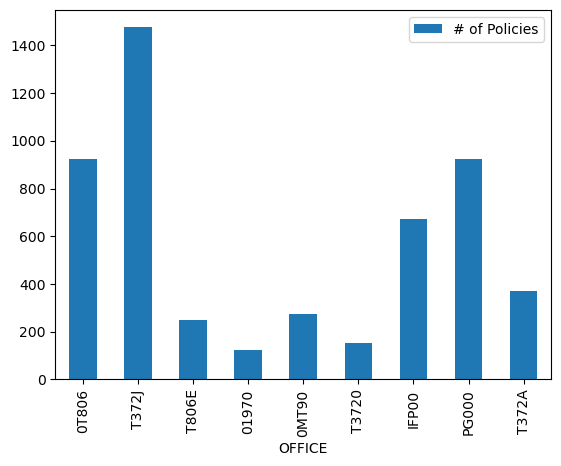

In [78]:
df = pd.DataFrame(OfficeName_Output,columns=['OFFICE','# of Policies'])
df.plot(x ='OFFICE', y='# of Policies', kind = 'bar')
plt.show()

**Distribution Channel Count W/ Graph**

In [79]:
DistributionChannelName=[]
for i in result["DISTRIBUTION_CHANNEL_NAME"]:
     flag=0
     for j in range(len(DistributionChannelName)):
          if i == DistributionChannelName[j]:
               flag+=1
          else:
               continue
     if flag==0:
          DistributionChannelName.append(i)

DistributionChannelName_Dictionary={'DISTRIBUTION_CHANNEL_NAME':[], '# of Policies':[]}

for i in DistributionChannelName:
     flag=0
     for j in result["DISTRIBUTION_CHANNEL_NAME"]:
          if j == i:
               flag+=1
     #Can change the requirement for number of Policies directly below
     
     if flag > 0:
          DistributionChannelName_Dictionary['DISTRIBUTION_CHANNEL_NAME'].append(i)
          DistributionChannelName_Dictionary['# of Policies'].append(flag)
     else:
      continue

DistributionChannelName_Output = pd.DataFrame.from_dict(DistributionChannelName_Dictionary)
DistributionChannelName_Output

,DISTRIBUTION_CHANNEL_NAME,# of Policies
0,MKTNG ORGANIZATIONS,437
1,EDWARD JONES,1175
2,WFG,2040
3,WIREHOUSE,780
4,M FINANCIAL,782
5,REG LIFE OFFICES,2178
6,COLI UNIT,56
7,ALTERNATIVE DISTRIB,25
8,MISC,11
9,NASD,2


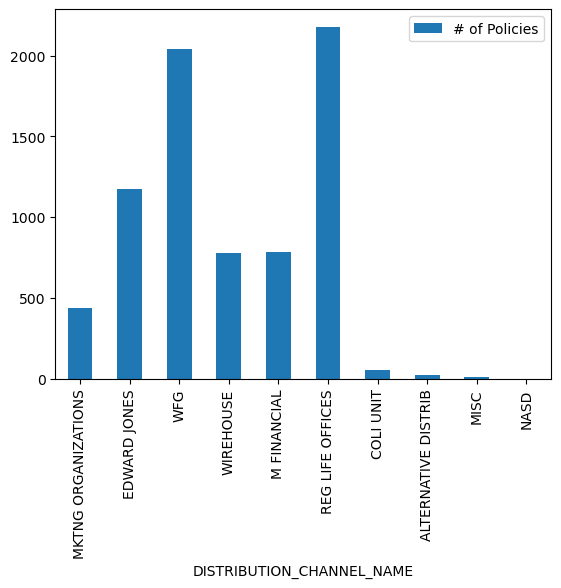

In [80]:
df = pd.DataFrame(DistributionChannelName_Output,columns=['DISTRIBUTION_CHANNEL_NAME','# of Policies'])
df.plot(x ='DISTRIBUTION_CHANNEL_NAME', y='# of Policies', kind = 'bar')
plt.show()

**Product Name Count W/ Graph**

In [81]:
ProductName=[]
for i in result["Product.ProductName"]:
     flag=0
     for j in range(len(ProductName)):
          if i == ProductName[j]:
               flag+=1
          else:
               continue
     if flag==0:
          ProductName.append(i)

ProductName_Dictionary={'Product Name':[], '# of Policies':[]}

for i in ProductName:
     flag=0
     for j in result["Product.ProductName"]:
          if j == i:
               flag+=1
     ProductName_Dictionary['Product Name'].append(i)
     ProductName_Dictionary['# of Policies'].append(flag)

ProductName_Output = pd.DataFrame.from_dict(ProductName_Dictionary)
ProductName_Output

,Product Name,# of Policies
0,PDXIUL2,3192
1,PREMIERCARE,1
2,IPEP3,96
3,PSHARBORVUL,1313
4,PROMISEGUL,22
5,PACADMIRALVUL,1074
6,MVPVULADMIRAL,92
7,MVPIULA2,347
8,PSVUL2,368
9,VFVENTURE,215


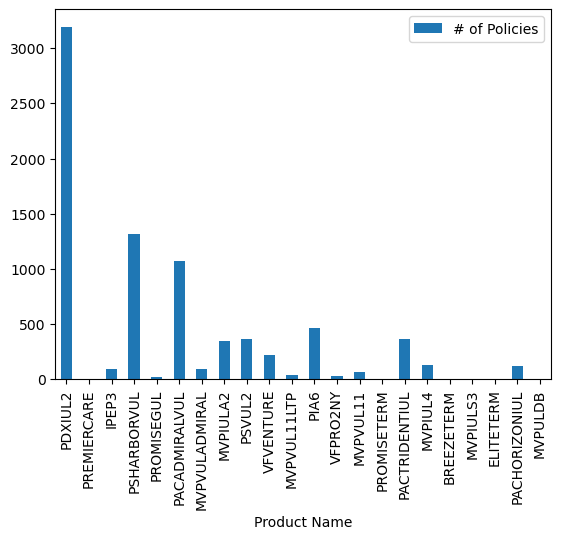

In [82]:
df = pd.DataFrame(ProductName_Output,columns=['Product Name','# of Policies'])
df.plot(x ='Product Name', y='# of Policies', kind = 'bar')
plt.show()

**CREATING GROUPS FOR AGE AND FACE AMOUNT INTO GROUPS**

In [83]:
#Where 0 represents the Age Group from 0-34
#Where 1 represents the Age Group from 35-65
#Where 2 represents the Age Group of 65+ 
result['Insured1.AgeAtIssue'].apply(int)
result['Insured1.AgeAtIssue'] = np.where((result['Insured1.AgeAtIssue'] < 35) & (result['Insured1.AgeAtIssue'] > 2 ), 0, result['Insured1.AgeAtIssue'])
result['Insured1.AgeAtIssue'] = np.where((result['Insured1.AgeAtIssue'] >= 35) & (result['Insured1.AgeAtIssue'] <= 65 ), 1, result['Insured1.AgeAtIssue'])
result['Insured1.AgeAtIssue'] = np.where(result['Insured1.AgeAtIssue'] > 65, 2, result['Insured1.AgeAtIssue'])
#result['Insured1.AgeAtIssue'].map({0:'<35',1:'35-65',2:'65+'})
result.head(3)

,ReferenceData.IllustrationID,Product.ProductName,Product.ProductFamily,Insured1.AgeAtIssue,LTC,NLG,PolicyScalars.HasDistributions,PolicyScalars.PremiumDuration,PolicyScalars.FaceAmountTotal,ReferenceData.RunDateTimeUTC,PolicyScalars.DistributionStartYear,PolicyScalars.DistributionEndYear,ReferenceData.SalesConcept,Policy_Number,IllustrationID,LISTBILL,OFFICE,PARENT_OFFICE_NAME,DISTRIBUTION_CHANNEL_NAME,LISTBILL_IND
34151,f681e960-c372-4f60-befd-85b7e57f8bd8,PDXIUL2,Indexed Universal,1.0,False,False,False,75.0,250000.0,2021-01-14T17:50:41.8347931Z,None,None,None,VF53694910,f681e960-c372-4f60-befd-85b7e57f8bd8,,0R710,Leveraged Liquidity Llc,MKTNG ORGANIZATIONS,False
15299,6e0b9ade-29be-4e1f-8391-5fe4cb5bdb4e,PREMIERCARE,Pacific PremierCare,1.0,False,False,False,1.0,115761.0,2021-01-14T19:35:14.167782Z,None,None,None,VP66433320,6e0b9ade-29be-4e1f-8391-5fe4cb5bdb4e,,0T806,EDWARD JONES & COMPANY,EDWARD JONES,False
7447,36000089-a688-4056-b6af-2d6d6b281911,IPEP3,Indexed Universal,1.0,False,True,False,20.0,100000.0,2021-01-29T16:49:53.1158512Z,None,None,None,VF53702140,36000089-a688-4056-b6af-2d6d6b281911,,T372J,Transamerica Financial Advisors Inc,WFG,False


In [84]:
# 0 represents 0-150,000
# 1 represents 150,000-300,000
# 2 represents 300,000-450,000
# 3 represents 450,000-600,000
# 4 represents 600,000-750,000
# 5 represents 750,000-900,000
# 6 represents 900,000-1,200,000
# 7 represents 1,200,000--1,500,000
# 8 represents 1,500,000+
result['PolicyScalars.FaceAmountTotalLevel'] = result['PolicyScalars.FaceAmountTotal']
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] < 150000) & (result['PolicyScalars.FaceAmountTotal'] > 10 ), 0, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >=150000) & (result['PolicyScalars.FaceAmountTotal'] <= 300000 ), 1, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 300000) & (result['PolicyScalars.FaceAmountTotal'] <= 450000 ), 2, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 450000) & (result['PolicyScalars.FaceAmountTotal'] <= 600000 ), 3, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 600000) & (result['PolicyScalars.FaceAmountTotal'] <= 750000 ), 4, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 750000) & (result['PolicyScalars.FaceAmountTotal'] <= 900000 ), 5, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 900000) & (result['PolicyScalars.FaceAmountTotal'] <= 1050000 ), 6, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 1050000) & (result['PolicyScalars.FaceAmountTotal'] <= 1200000 ), 6, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 1200000) & (result['PolicyScalars.FaceAmountTotal'] <= 1350000 ), 7, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 1350000) & (result['PolicyScalars.FaceAmountTotal'] <= 1500000 ), 7, result['PolicyScalars.FaceAmountTotalLevel'])
result['PolicyScalars.FaceAmountTotalLevel'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 1500000) , 8, result['PolicyScalars.FaceAmountTotalLevel'])

result['PolicyScalars.FaceAmountTotalDivide'] = result['PolicyScalars.FaceAmountTotal']
result['PolicyScalars.FaceAmountTotalDivide'] = np.where((result['PolicyScalars.FaceAmountTotal'] < 900000), 0, result['PolicyScalars.FaceAmountTotalDivide'])
result['PolicyScalars.FaceAmountTotalDivide'] = np.where((result['PolicyScalars.FaceAmountTotal'] >= 900000), 1, result['PolicyScalars.FaceAmountTotalDivide'])
result['PolicyScalars.FaceAmountTotalBool'] = result['PolicyScalars.FaceAmountTotalDivide'].astype('bool')

result.head(1)

,ReferenceData.IllustrationID,Product.ProductName,Product.ProductFamily,Insured1.AgeAtIssue,LTC,NLG,PolicyScalars.HasDistributions,PolicyScalars.PremiumDuration,PolicyScalars.FaceAmountTotal,ReferenceData.RunDateTimeUTC,...,Policy_Number,IllustrationID,LISTBILL,OFFICE,PARENT_OFFICE_NAME,DISTRIBUTION_CHANNEL_NAME,LISTBILL_IND,PolicyScalars.FaceAmountTotalLevel,PolicyScalars.FaceAmountTotalDivide,PolicyScalars.FaceAmountTotalBool
34151,f681e960-c372-4f60-befd-85b7e57f8bd8,PDXIUL2,Indexed Universal,1.0,False,False,False,75.0,250000.0,2021-01-14T17:50:41.8347931Z,...,VF53694910,f681e960-c372-4f60-befd-85b7e57f8bd8,,0R710,Leveraged Liquidity Llc,MKTNG ORGANIZATIONS,False,1.0,0.0,False


**FINDING THE RESPECTIVE COUNTS FOR EACH AGE GROUP**

In [85]:
from argparse import ArgumentDefaultsHelpFormatter

YoungestAge=0
MiddleAge=0
OldestAge=0
NAAge=0

for age in result["Insured1.AgeAtIssue"]:
    if age==0:
        YoungestAge+=1
    elif age==1:
        MiddleAge+=1
    elif age==2:
        OldestAge+=1
    else:
        NAAge+=1

dataAGE = {'Ages': ['0-34', '35-65', '65+', 'NA'], '# Consumers': [YoungestAge, MiddleAge, OldestAge, NAAge]} 
AgeData_Output = pd.DataFrame.from_dict(dataAGE)
AgeData_Output

,Ages,# Consumers
0,0-34,1453
1,35-65,5850
2,65+,633
3,NA,0


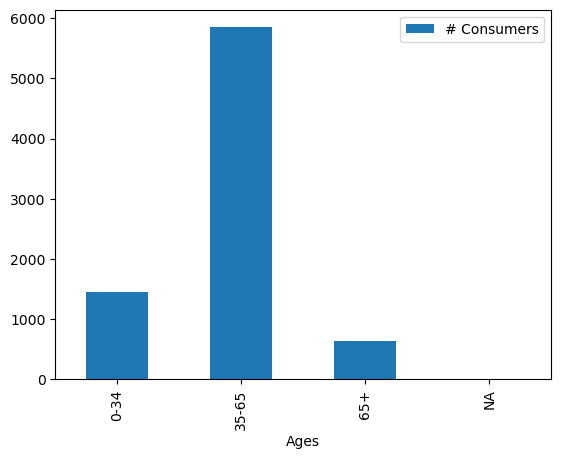

In [86]:
df = pd.DataFrame(AgeData_Output,columns=['Ages','# Consumers'])
df.plot(x ='Ages', y='# Consumers', kind = 'bar')
plt.show()

In [87]:
result['period_length'] = result['PolicyScalars.PremiumDuration']
result['period_length'] = np.where((result['period_length'] >=0) & (result['period_length'] < 10 ), 0, result['period_length']) 
result['period_length'] = np.where((result['period_length'] >=10) & (result['period_length'] < 20 ), 1, result['period_length']) 
result['period_length'] = np.where((result['period_length'] >=20) & (result['period_length'] < 30 ), 2, result['period_length']) 
result['period_length'] = np.where((result['period_length'] >=30), 3, result['period_length']) 
result['PolicyScalars.PremiumDuration'] = result['period_length']

In [88]:
result['period_length'] = result['PolicyScalars.DistributionEndYear']-result['PolicyScalars.DistributionStartYear']
result['period_length'] = np.where((result['period_length'] >=0) & (result['period_length'] < 10 ), 0, result['period_length']) 
result['period_length'] = np.where((result['period_length'] >=10) & (result['period_length'] < 20 ), 1, result['period_length']) 
result['period_length'] = np.where((result['period_length'] >=20) & (result['period_length'] < 30 ), 2, result['period_length']) 
result['period_length'] = np.where((result['period_length'] >=30), 3, result['period_length']) 
result['WITHDRAWAL_PERIOD'] = result['period_length']

**Created Policies by Producer Table**

In [89]:
result.columns

Index(['ReferenceData.IllustrationID', 'Product.ProductName',
       'Product.ProductFamily', 'Insured1.AgeAtIssue', 'LTC', 'NLG',
       'PolicyScalars.HasDistributions', 'PolicyScalars.PremiumDuration',
       'PolicyScalars.FaceAmountTotal', 'ReferenceData.RunDateTimeUTC',
       'PolicyScalars.DistributionStartYear',
       'PolicyScalars.DistributionEndYear', 'ReferenceData.SalesConcept',
       'Policy_Number', 'IllustrationID', 'LISTBILL', 'OFFICE',
       'PARENT_OFFICE_NAME', 'DISTRIBUTION_CHANNEL_NAME', 'LISTBILL_IND',
       'PolicyScalars.FaceAmountTotalLevel',
       'PolicyScalars.FaceAmountTotalDivide',
       'PolicyScalars.FaceAmountTotalBool', 'period_length',
       'WITHDRAWAL_PERIOD'],
      dtype='object')

In [92]:
AGE=pd.crosstab(result["OFFICE"],result["Insured1.AgeAtIssue"]) 
AGE.columns = ['0-34', '35-65', '65+']
PRODUCT=pd.crosstab(result["OFFICE"],result["Product.ProductName"])
PRODUCTFAMILY = pd.crosstab(result["OFFICE"],result["Product.ProductFamily"])
LTC=pd.crosstab(result["OFFICE"],result["LTC"])
LTC.columns = ['LTC:False', 'LTC:True']
#NLG=pd.crosstab(result["OFFICE"],result["NLG"])
#NLG.columns = ['NLG:False', 'NLG:True']
DISTRIBUTIONS =pd.crosstab(result["OFFICE"],result["PolicyScalars.HasDistributions"])
DISTRIBUTIONS.columns = ['DISRIBUTIONS:False', 'DISTRIBUTIONS:True']
AMOUNT=pd.crosstab(result["OFFICE"],result["PolicyScalars.FaceAmountTotalLevel"])
AMOUNT.columns = ['0-150k', '150k-300k','300k-450k','450k-600k','600k-750k','750k-900k','900k-1.2M','1.2M-1.5M','1.5M+']
AVERAGE_AMOUNT = result.groupby("OFFICE")['PolicyScalars.FaceAmountTotal'].mean()
AVERAGE_AMOUNT.columns = ["OFFICE","Average Face Amount"]
FACE_AMOUNT_900000_PLUS = pd.crosstab(result["OFFICE"],result["PolicyScalars.FaceAmountTotalBool"])
FACE_AMOUNT_900000_PLUS.columns = ['FACE_AMOUNT_900000_PLUS:False', 'FACE_AMOUNT_900000_PLUS:True']
LISTBILL =pd.crosstab(result["OFFICE"],result["LISTBILL_IND"])
LISTBILL.columns = ['LISTBILL:False', 'LISTBILL:True']
NLG = pd.crosstab(result["OFFICE"],result["NLG"])
NLG.columns = ["NLG:False","NLG:True"]
WITHDRAWAL_PERIOD =pd.crosstab(result["OFFICE"],result['WITHDRAWAL_PERIOD'])
WITHDRAWAL_PERIOD.columns = ['WithDrawal: 0-9', 'WithDrawal: 10-19','WithDrawal: 20-29','WithDrawal: 30-39']
PREMIUM_PERIOD =pd.crosstab(result["OFFICE"],result['PolicyScalars.PremiumDuration'])
PREMIUM_PERIOD.columns = ['Premium Duration: 0-9', 'Premium Duration: 10-19','Premium Duration: 20-29','Premium Duration: 30-39']
DISTRIBUTION_CHANNEL_NAME = pd.crosstab(result["OFFICE"],result['DISTRIBUTION_CHANNEL_NAME'])
SALES_CONCEPT = pd.crosstab(result["OFFICE"],result['ReferenceData.SalesConcept'])

In [93]:
frames = [AGE,PRODUCT,PRODUCTFAMILY,LTC,NLG,DISTRIBUTIONS, AMOUNT, FACE_AMOUNT_900000_PLUS, LISTBILL, WITHDRAWAL_PERIOD,DISTRIBUTION_CHANNEL_NAME,SALES_CONCEPT]
frames2 = [AGE,PRODUCT,PRODUCTFAMILY,LTC,NLG,DISTRIBUTIONS, AMOUNT, FACE_AMOUNT_900000_PLUS, AVERAGE_AMOUNT,LISTBILL, WITHDRAWAL_PERIOD,DISTRIBUTION_CHANNEL_NAME,SALES_CONCEPT]
result = pd.concat(frames2,axis=1)
frames3 =  []
for df in frames:
    res = df.div(df.sum(axis=1),axis=0)
    if res.shape[1]==2:
        res = res.iloc[:,1:]
    frames3.append(res)
count = AGE.sum(axis=1)
count.columns = ['Count']
frames3.append(AVERAGE_AMOUNT)
#frames3.append(OFFICE_MAPPING)
#frames3.append(count)
percents = pd.concat(frames3,axis=1)
#result2.columns = [        '0-34',             '35-65',             '65+',     'ELITETERM',
#            'MVPIULA2', 'PACADMIRALVUL', 'PACHORIZONIUL', 'PACTRIDENTIUL',
#             'PDXIUL2',          'PIA6',   'PSHARBORVUL',        'PSVUL2',
#           'VFVENTURE',           'LTC False',            'LTC True',       'DISRIBUTIONS:False', 'DISTRIBUTIONS:True',
#           '0-150k', '150k-300k','300k-450k','450k-600k','600k-750k','750k-900k','900k-1.05M','1.05M-1.2M','1.2M-1.35M','1.35M-1.5M','1.5M+',
#           "Average Face Amount",'LISTBILL:False', 'LISTBILL:True',
#           'WithDrawal: 0-9', 'WithDrawal: 10-19','WithDrawal: 20-29','WithDrawal: 30-39',
#           'Premium Duration: 0-9', 'Premium Duration: 10-19','Premium Duration:: 20-29','Premium Duration: 30-39'
#       ]
result

,0-34,35-65,65+,BREEZETERM,ELITETERM,IPEP3,MVPIUL4,MVPIULA2,MVPIULS3,MVPULDB,...,ALTERNATIVE DISTRIB,COLI UNIT,EDWARD JONES,M FINANCIAL,MISC,MKTNG ORGANIZATIONS,NASD,REG LIFE OFFICES,WFG,WIREHOUSE
OFFICE,,,,,,,,,,,,,,,,,,,,,
00010,9,23,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0
00180,6,17,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25,0,0
00190,8,22,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,30,0,0
00200,0,6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
00260,1,9,1,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T806A,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
T806E,5,210,35,0,0,0,0,0,0,0,...,0,0,250,0,0,0,0,0,0,0
T806F,0,1,1,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


Creates a files with percentages (note that for categorical non boolean column titles, the sum of percents is 100%)

In [94]:
percents.to_csv('Preprocessed_files.csv')
percents

,0-34,35-65,65+,BREEZETERM,ELITETERM,IPEP3,MVPIUL4,MVPIULA2,MVPIULS3,MVPULDB,...,COLI UNIT,EDWARD JONES,M FINANCIAL,MISC,MKTNG ORGANIZATIONS,NASD,REG LIFE OFFICES,WFG,WIREHOUSE,PolicyScalars.FaceAmountTotal
OFFICE,,,,,,,,,,,,,,,,,,,,,
00010,0.250000,0.638889,0.111111,0.0,0.0,0.027778,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.536254e+06
00180,0.240000,0.680000,0.080000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.328836e+06
00190,0.266667,0.733333,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.128195e+05
00200,0.000000,0.857143,0.142857,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.483703e+05
00260,0.090909,0.818182,0.090909,0.0,0.0,0.272727,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.943417e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T806A,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+05
T806E,0.020000,0.840000,0.140000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.524977e+05
T806F,0.000000,0.500000,0.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000e+04
